# Spotify ML Analysis


### This analysis is to understand what makes a song popular on Spotify using audio features and machine learning.

We aim to:

Explore patterns in song popularity

Identify which audio features influence popularity

Predict song popularity using ML models

Segment songs into meaningful clusters

Generate insights that can support music recommendation and content strategy

### Key Business Questions

1. How is song popularity distributed across Spotify tracks?

2. Which audio features are most related to popularity?

3. Can we predict song popularity using audio characteristics?

4. Which features matter most in predicting popularity?

5. Can songs be grouped into meaningful clusters based on audio features?

## 4.1 Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_dataset_eda.csv to cleaned_dataset_eda.csv


## 4.2 Load Data


In [8]:

df = pd.read_csv('/content/cleaned_dataset_eda.csv')

In [9]:
# Display basic information about the dataset

df.shape

(113549, 26)

In [10]:
# Display the first few rows of the dataset
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,track_genre_category,popularity_category,duration_min,length_category,energy_score,mood
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.715,87.917,4,acoustic,acoustic,High,3.844433,Standard,0.5685,Happy
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.267,77.489,4,acoustic,acoustic,Medium,2.493500,Short,0.2930,Sad
2,1iJBSr7s7jYXzM8EGcbK5b,"Ingrid Michaelson, ZAYN",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.120,76.332,4,acoustic,acoustic,Medium,3.513767,Standard,0.3985,Sad
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.143,181.740,3,acoustic,acoustic,High,3.365550,Standard,0.1628,Sad
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.167,119.949,4,acoustic,acoustic,High,3.314217,Standard,0.5305,Sad


In [11]:
# column names
df.columns.tolist()

['track_id',
 'artists',
 'album_name',
 'track_name',
 'popularity',
 'duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'track_genre',
 'track_genre_category',
 'popularity_category',
 'duration_min',
 'length_category',
 'energy_score',
 'mood']

In [12]:
# check data types
df.dtypes

,0
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64
key,int64


In [13]:
# Missing Values
df.isnull().sum()

,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


## Data Preparation & Quality Checks

Dataset contains 113549 Spotify tracks with 26 features

No missing values in critical numerical features

One categorical column (length_category) had missing values, which were filled with "Unknown"

Data types were validated and found suitable for analysis

No duplicate or corrupted records identified

Result: Clean, high-quality dataset ready for ML and dashboarding

## 4.3 Exploratory Data Analysis

In [14]:
# Statistical Summary
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,energy_score
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,0.763694,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218,3.801356,0.604561
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,0.092696,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117,1.773552,0.161683
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143100,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,0.731239,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000,2.903067,0.517000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,0.786749,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000,3.550000,0.639500
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,0.823669,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000,4.359800,0.722500
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,1.000000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,87.288250,0.978000


## 4.4 Check for popularity distribution


Text(0.5, 1.0, 'Distribution of Song Popularity')

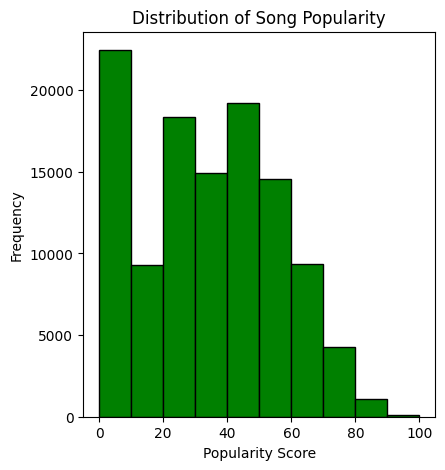

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['popularity'], color='green', edgecolor='black')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Song Popularity')

## Popularity Distribution

Song popularity is right-skewed

Most songs have low to medium popularity

Only a small percentage of tracks achieve very high popularity

### Key Insight:

Viral hits are rare — popularity is concentrated among a small subset of tracks.


Feature Correlation with Popularity:
popularity          1.000000
loudness            0.047368
danceability        0.034407
time_signature      0.030567
tempo               0.012187
energy             -0.002447
key                -0.004167
liveness           -0.005668
duration_min       -0.007928
mode               -0.015009
acousticness       -0.022356
valence            -0.041097
speechiness        -0.045463
instrumentalness   -0.094718
Name: popularity, dtype: float64


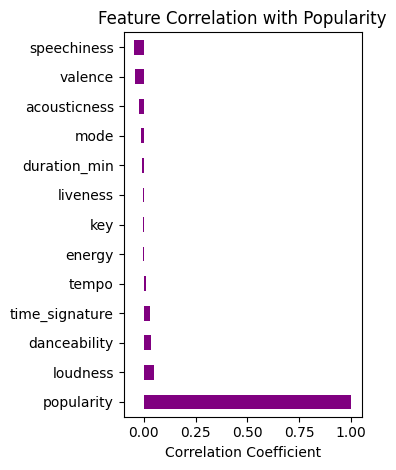

In [16]:
# Audio features correlation with popularity
audio_features = [
    'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence', 'time_signature', 'duration_min', 'mode', 'key'
]

correlations = df[audio_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)
print("\nFeature Correlation with Popularity:")
print(correlations)

plt.subplot(1, 2, 2)
correlations[:-1].plot(kind='barh', color='purple')
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with Popularity')
plt.tight_layout()
# plt.savefig('../image/correlation_analysis.png')
plt.show()

### Analysed correlations between popularity and key audio features.

Top correlations (though generally weak):

- Loudness

- Danceability

Strong negative correlation:

- Instrumentalness

Key Insight:

Popular songs tend to be louder, more danceable, and less instrumental (i.e., more vocal-focused).

- Correlations are weak overall → popularity is influenced by many non-audio factors (marketing, artist fame, playlists).

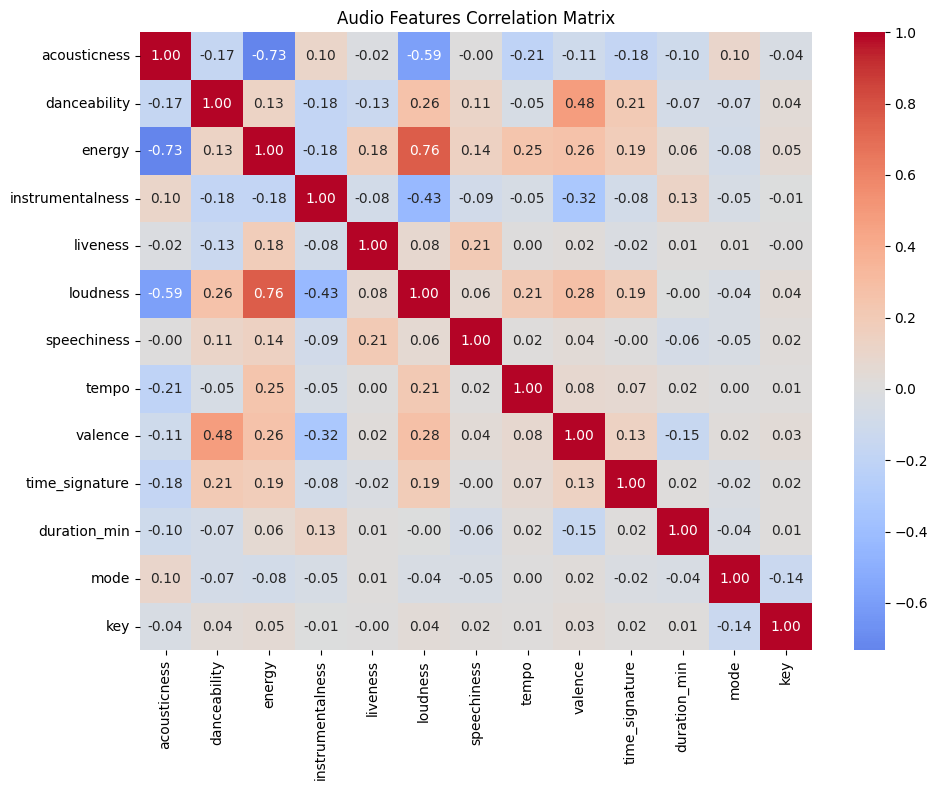

In [17]:
# Correlation heatmap for all audio features
plt.figure(figsize=(10, 8))
correlation_matrix = df[audio_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Audio Features Correlation Matrix')
plt.tight_layout()
# plt.savefig('../image/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

##  4.5 Popularity Prediction (Regression)

In [18]:
# Data preparation for regression
X = df[audio_features].copy()
y = df['popularity'].copy()

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# Scale features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Train models to compare
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, n_jobs=1, random_state=42)
}

results = {}

In [23]:
for model_name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Evaluate
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)

    results[model_name] = {
            'model': model,
            'y_pred': y_pred_test,
            'r2_test': r2_test,
            'rmse': rmse_test,
            'mae': mae_test
        }

    print(f"\n{model_name} Results:")
    print(f"  R² Score (Train): {r2_train:.4f}")
    print(f"  R² Score (Test): {r2_test:.4f}")
    print(f"  RMSE: {rmse_test:.2f}")
    print(f"  MAE: {mae_test:.2f}")


Linear Regression Results:
  R² Score (Train): 0.0229
  R² Score (Test): 0.0241
  RMSE: 22.12
  MAE: 18.50

Random Forest Results:
  R² Score (Train): 0.9069
  R² Score (Test): 0.5393
  RMSE: 15.20
  MAE: 10.79


### Key Insight:

- Audio features explain ~54% of popularity variation, which is reasonable given that popularity also depends on external factors.

In [24]:
# Select best model (you can change this logic)
best_model_name = 'Random Forest'
best_model_data = results[best_model_name]
best_model = best_model_data['model']
y_pred = best_model_data['y_pred']


Random Forest - Feature Importance:
             Feature  Importance
0       acousticness    0.104580
10      duration_min    0.102019
7              tempo    0.101964
1       danceability    0.099505
8            valence    0.098396
6        speechiness    0.096884
5           loudness    0.093147
2             energy    0.089168
4           liveness    0.084880
3   instrumentalness    0.071666
12               key    0.041941
11              mode    0.009498
9     time_signature    0.006353


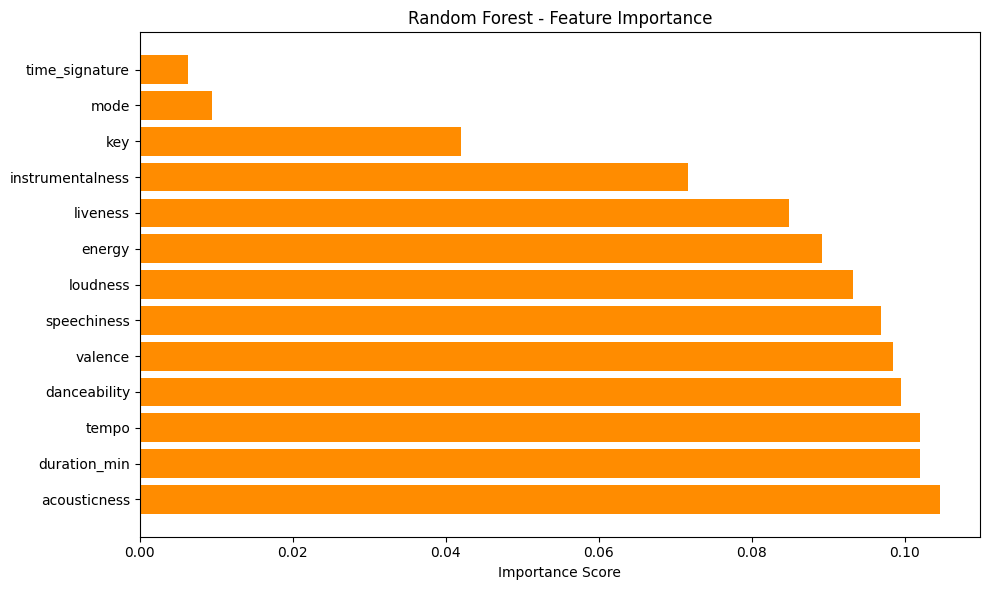

In [25]:
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': audio_features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"\n{best_model_name} - Feature Importance:")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='darkorange')
    plt.xlabel('Importance Score')
    plt.title(f'{best_model_name} - Feature Importance')
    plt.tight_layout()
    # plt.savefig('../image/feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

### Key Insight:

- A mix of sound texture, rhythm, emotion, and vocal presence drives popularity, not a single dominant factor.

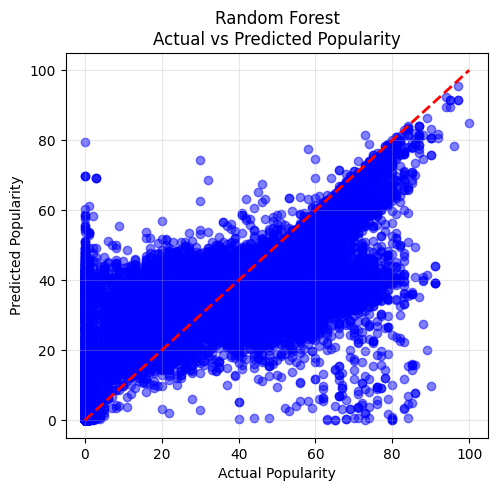

In [26]:
# Actual vs Predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title(f'{best_model_name}\nActual vs Predicted Popularity')
plt.grid(True, alpha=0.3)

- Actual vs Predicted plot shows reasonable alignment with some extreme errors

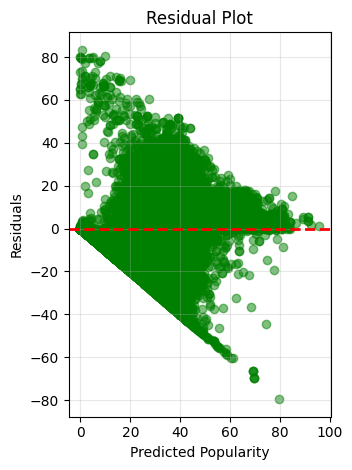

In [27]:
# Residuals
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)

plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('../image/actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

- Residual plot shows higher errors for very popular songs

### Key Insight:

- ML models struggle with viral hits, suggesting the influence of social and platform-driven effects.

In [46]:
# Rerun the model on the entire dataset to save the prediction values in a new column added to the dataframe
X_scaled = scaler.fit_transform(X)
y_pred_full = model.predict(X_scaled)

In [47]:
# Add predictions to the original dataframe
df_pred = df.copy()
df_pred['predicted_popularity'] = y_pred_full
df_pred.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,time_signature,track_genre,track_genre_category,popularity_category,duration_min,length_category,energy_score,mood,cluster,predicted_popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,4,acoustic,acoustic,High,3.844433,Standard,0.5685,Happy,2,68.670
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,4,acoustic,acoustic,Medium,2.493500,Short,0.2930,Sad,1,48.940
2,1iJBSr7s7jYXzM8EGcbK5b,"Ingrid Michaelson, ZAYN",To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,4,acoustic,acoustic,Medium,3.513767,Standard,0.3985,Sad,1,51.890
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,3,acoustic,acoustic,High,3.365550,Standard,0.1628,Sad,0,25.325
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,4,acoustic,acoustic,High,3.314217,Standard,0.5305,Sad,1,65.760


## 4.6 Song Clustering - KMeans

In [28]:
from sklearn.cluster import KMeans

# Data preparation for clustering
X_cluster = df[audio_features].copy()
# X_cluster = X_cluster.fillna(X_cluster.mean())


In [29]:
# Scale features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

In [30]:
# Find optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")


K=2: Inertia=1250572.86, Silhouette=0.215
K=3: Inertia=1157002.80, Silhouette=0.121
K=4: Inertia=1091416.06, Silhouette=0.113
K=5: Inertia=1028245.67, Silhouette=0.107
K=6: Inertia=965783.57, Silhouette=0.125
K=7: Inertia=918812.59, Silhouette=0.118
K=8: Inertia=873301.12, Silhouette=0.124
K=9: Inertia=829342.60, Silhouette=0.131
K=10: Inertia=806700.05, Silhouette=0.129


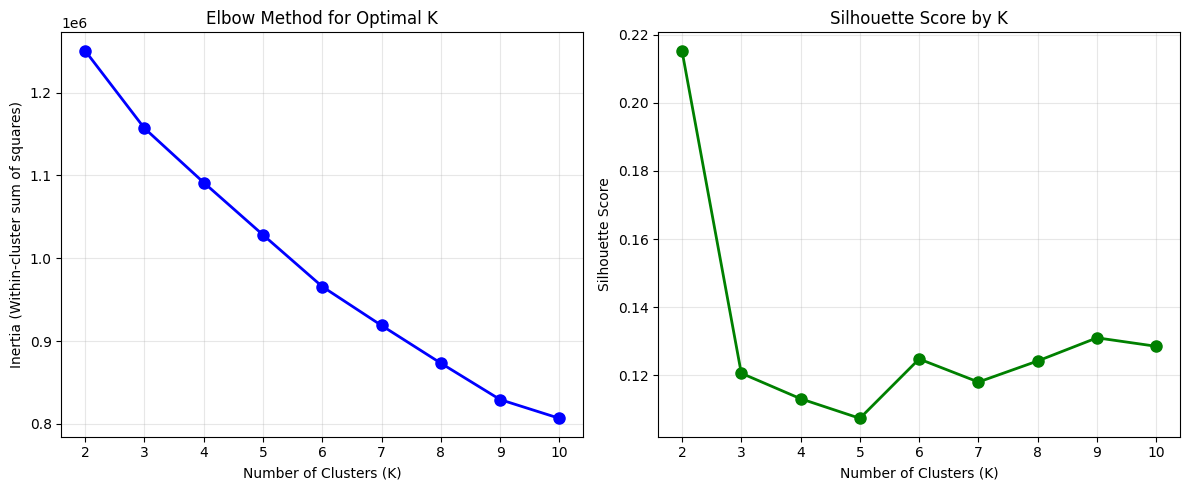

In [32]:
# Plot elbow curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by K')
plt.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('../image/elbow_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
# Train final KMeans model (choose k based on elbow plot - typically 3-5)

optimal_k = 4  # Can change this based on the elbow plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

print(f"\n\nUsing optimal K = {optimal_k}")
print(f"Final Silhouette Score: {silhouette_score(X_cluster_scaled, cluster_labels):.3f}")




Using optimal K = 4
Final Silhouette Score: 0.113


In [43]:
# Add cluster labels
df['cluster'] = cluster_labels

In [44]:
# Cluster analysis
print(f"\nCluster Distribution:")
print(df['cluster'].value_counts().sort_index())

print(f"\nCluster Profiles:")
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id][audio_features]
    print(f"\nCluster {cluster_id}:")
    print(cluster_data.mean())


Cluster Distribution:
cluster
0     8248
1    26068
2    45051
3    34182
Name: count, dtype: int64

Cluster Profiles:

Cluster 0:
acousticness          0.828491
danceability          0.354308
energy                0.196918
instrumentalness      0.759935
liveness              0.173075
loudness              0.537392
speechiness           0.053144
tempo               103.774161
valence               0.182569
time_signature        3.554801
duration_min          3.705292
mode                  0.633972
key                   4.898642
dtype: float64

Cluster 1:
acousticness          0.660835
danceability          0.541597
energy                0.396279
instrumentalness      0.053521
liveness              0.186817
loudness              0.722592
speechiness           0.061355
tempo               113.649668
valence               0.411349
time_signature        3.828986
duration_min          3.576321
mode                  0.764462
key                   4.982239
dtype: float64

Cluster 2:
acoustic

### Cluster Profiles

The clusters mainly separated by instrumentalness, energy, danceability, and tempo.

Cluster 0 – Instrumental/acoustic

- High acousticness, low energy

- Instrumental or acoustic songs

Cluster 1 – Light Dance or songs

- Quate high danceability and medium valence

- Mainstream pop songs

Cluster 2 – Disco/Pop

- High danceability and valence

- Feel-good, mainstream pop songs

Cluster 3 – Fast & Intense

- High energy and tempo

- Hard Rock/Metal

### Key Insight:

- Songs naturally group into distinct listening moods, which is ideal for playlists and recommendation systems.

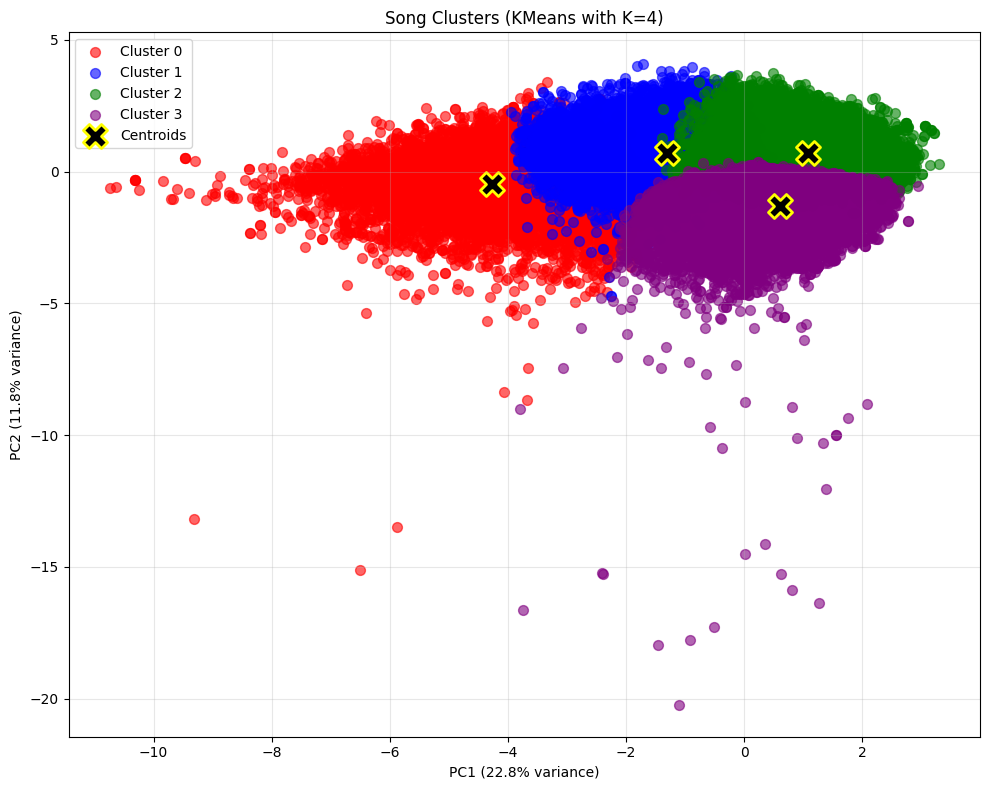

In [45]:
# Visualize clusters (using PCA for 2D visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for cluster_id in range(optimal_k):
    mask = cluster_labels == cluster_id
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
               c=colors[cluster_id % len(colors)],
               label=f'Cluster {cluster_id}',
               alpha=0.6, s=50)

plt.scatter(pca.transform(kmeans_final.cluster_centers_)[:, 0],
           pca.transform(kmeans_final.cluster_centers_)[:, 1],
           c='black', marker='X', s=300, edgecolors='yellow', linewidths=2,
           label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title(f'Song Clusters (KMeans with K={optimal_k})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig('../image/cluster_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


In [48]:
df_pred.isnull().sum()

,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [49]:
# Save for dashboard
df_pred.to_csv('ml_dataset_dashboard.csv', index=False)

In [50]:
from google.colab import files
files.download("ml_dataset_dashboard.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>